<a href="https://colab.research.google.com/github/BonthuManojKumarReddy/ML-1/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Loading the Dataset**

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/BonthuManojKumarReddy/ML-1/main/SeoulBikeData.csv',encoding="ISO-8859-1")

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


#**Preprocessing the data**

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# renaming the columns
columns_rename={'Date':'date','Rented Bike Count':'rented_bike_count','Hour':'hour','Temperature(°C)':'temperature','Humidity(%)':'humidity','Wind speed (m/s)':'wind_speed', 'Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temperature','Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall','Snowfall (cm)':'snowfall','Seasons':'seasons','Holiday':'holiday','Functioning Day':'functioning_day'}

In [ ]:
df.rename(columns=columns_rename,inplace=True)

In [ ]:
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bike_count      8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radiation        8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
# changing datatype of the column 'date'
df['date']=df['date'].astype('datetime64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8760 non-null   datetime64[ns]
 1   rented_bike_count      8760 non-null   int64         
 2   hour                   8760 non-null   int64         
 3   temperature            8760 non-null   float64       
 4   humidity               8760 non-null   int64         
 5   wind_speed             8760 non-null   float64       
 6   visibility             8760 non-null   int64         
 7   dew_point_temperature  8760 non-null   float64       
 8   solar_radiation        8760 non-null   float64       
 9   rainfall               8760 non-null   float64       
 10  snowfall               8760 non-null   float64       
 11  seasons                8760 non-null   object        
 12  holiday                8760 non-null   object        
 13  fun

In [ ]:
df['date'].dt.year.unique()


array([2017, 2018])

In [ ]:
# Extracting month from 'date'
df['month']=df['date'].dt.month

In [ ]:
# Dropping  the column 'date' 
df.drop(['date'],axis=1,inplace=True)
df.head(5)

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


In [ ]:
df.shape

(8760, 14)

In [ ]:
df['rainfall'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
21.0       1
15.5       1
10.5       1
17.0       1
9.1        1
Name: rainfall, Length: 61, dtype: int64

In [ ]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# statistical info
df.describe(include='all')

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,NaN
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,6.526027
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,3.448048
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,4.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN,7.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN,10.000000


**Checking Null Values**

In [ ]:
df[df['hour'].isnull()]

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month


In [ ]:
df.isnull().sum()

rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
month                    0
dtype: int64

Text(0, 0.5, 'Percentage')

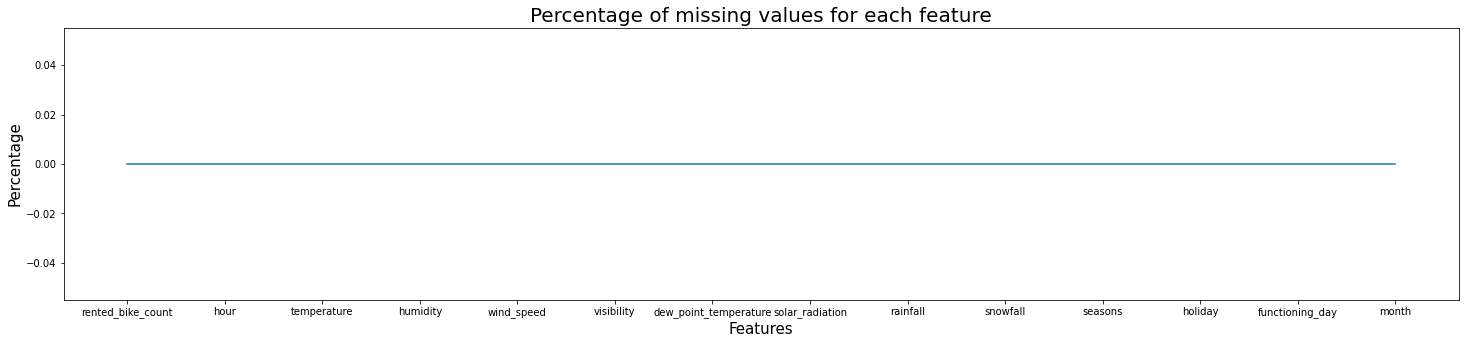

In [ ]:
# Plotting missing values of each feature
plt.figure(figsize=(25,5))
missing_percentages=df.isnull().sum()*100/df.shape[0]
plt.plot(missing_percentages)
plt.title('Percentage of missing values for each feature',fontsize=20)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percentage',fontsize=15)

In [ ]:
# Checking for duplication
df[df.duplicated()]

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month


In [ ]:
# Columns with datatype as object
cols=['month','hour','seasons','holiday','functioning_day']

In [ ]:
# Changing datatype object to category
for col in cols:
  df[col]=df[col].astype('category')
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   rented_bike_count      8760 non-null   int64   
 1   hour                   8760 non-null   category
 2   temperature            8760 non-null   float64 
 3   humidity               8760 non-null   int64   
 4   wind_speed             8760 non-null   float64 
 5   visibility             8760 non-null   int64   
 6   dew_point_temperature  8760 non-null   float64 
 7   solar_radiation        8760 non-null   float64 
 8   rainfall               8760 non-null   float64 
 9   snowfall               8760 non-null   float64 
 10  seasons                8760 non-null   category
 11  holiday                8760 non-null   category
 12  functioning_day        8760 non-null   category
 13  month                  8760 non-null   category
dtypes: category(5), float64(6), int64(3)
mem

#**Exploratory Data Analysis**

**Univariate Analysis**

In [ ]:
# Function for plotting each categorical feature against rented_bike_count 
def get_count_plot(x):
  x=x
  y='rented_bike_count'
  plt.figure(figsize=(15,5))
  sns.barplot(x=x,y=y,data=df)
  plt.title(x+' vs {}'.format(y),fontsize=20)
  plt.xlabel(x,fontsize=15)
  plt.ylabel(y,fontsize=15)

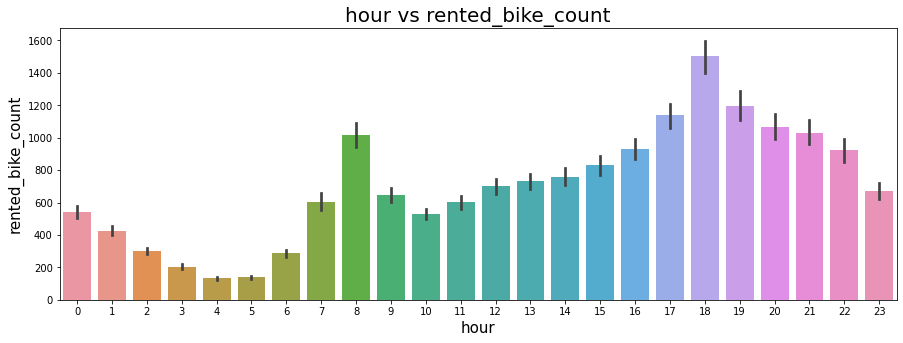

In [ ]:
# Hour vs rented_bike_count
get_count_plot('hour')

Inference:In morning hours(8-9) and in evening hours (5-8),the bikes taken for rental are more

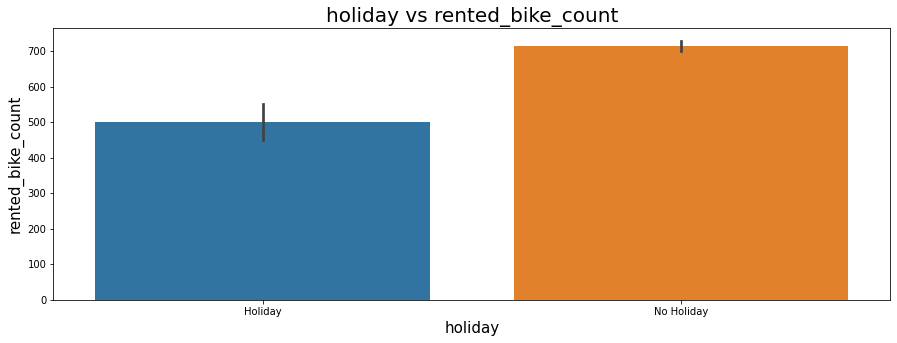

In [ ]:
# holiday vs rented_bike_count
get_count_plot('holiday')

Inference: During No Holidays,the bikes taken for rental are more than during holidays

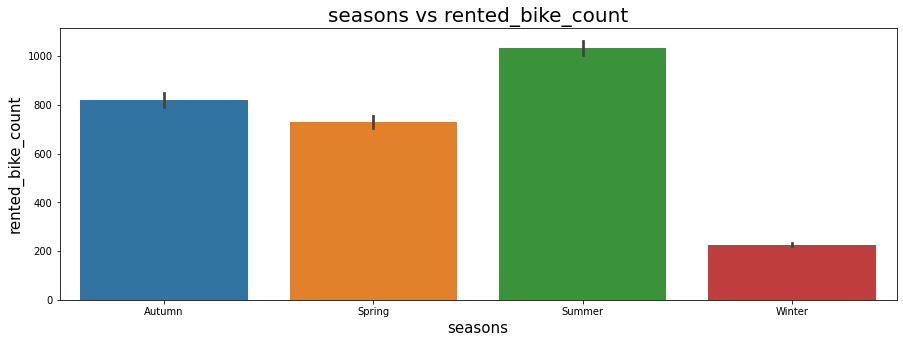

In [ ]:
# seasons vs rented_bike_count
get_count_plot('seasons')

Inference: Bikes taken for rental are more in Summer and less in Winter

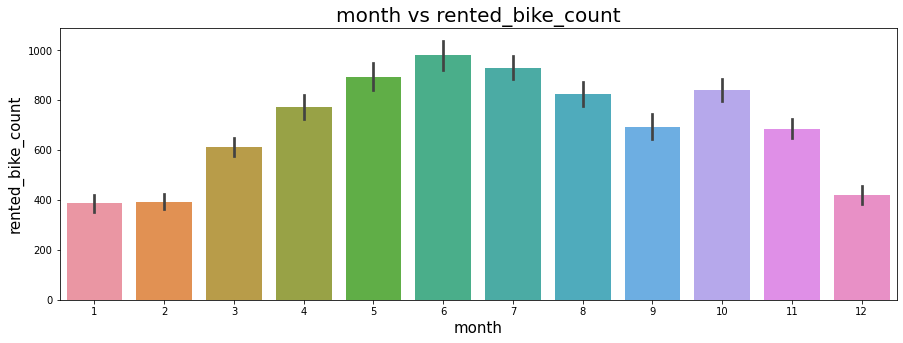

In [ ]:
# month vs rented_bike_count
get_count_plot('month')

Inference: Bike rentals are more from May to August month

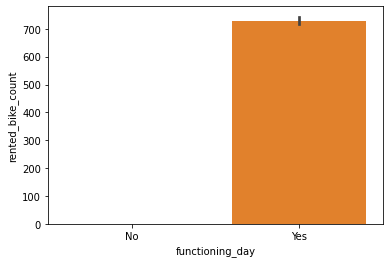

In [ ]:
# functioning_day vs rented_bike_count
sns.barplot(x='functioning_day',y='rented_bike_count',data=df)

Inference:  Bikes for rental are very high during functioning days

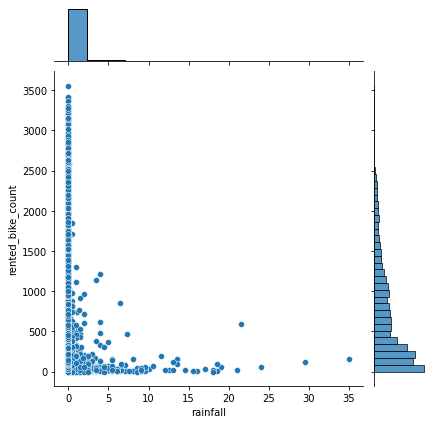

In [ ]:
sns.jointplot(x='rainfall',y='rented_bike_count',data=df)

Inference:

1) When there is no rainfall,the rental bikes count is very high

2)As rainfall increases,rental bikes count is decreasing exponentially(drastically)

Suggestion: When there is rainfall, try to provide raincoats to the customers to reach their destination as quick as possible

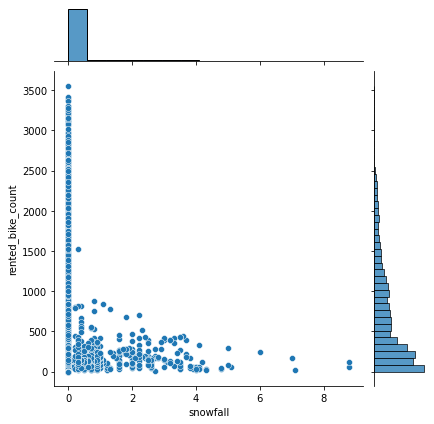

In [ ]:
sns.jointplot(x='snowfall',y='rented_bike_count',data=df)

Inference:

1) When there is no snowfall,the rental bikes count is very high.

2)As snowfall increases,rental bikes count is decreasing exponentially(drastically).

Suggestion: When there is snowfall, try to provide sweaters to the customers.

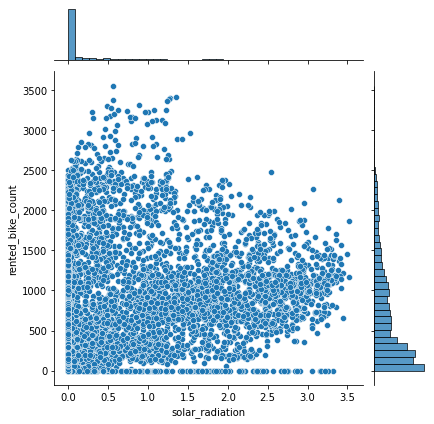

In [ ]:
sns.jointplot(x='solar_radiation',y='rented_bike_count',data=df)

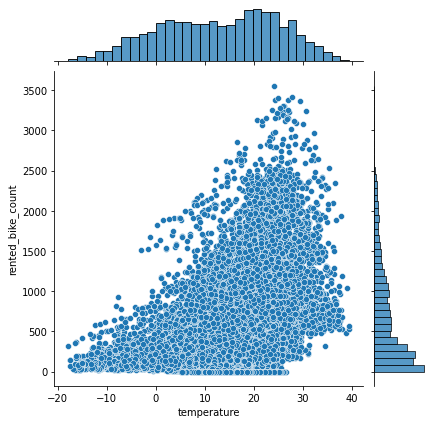

In [ ]:
sns.jointplot(x='temperature',y='rented_bike_count',data=df)

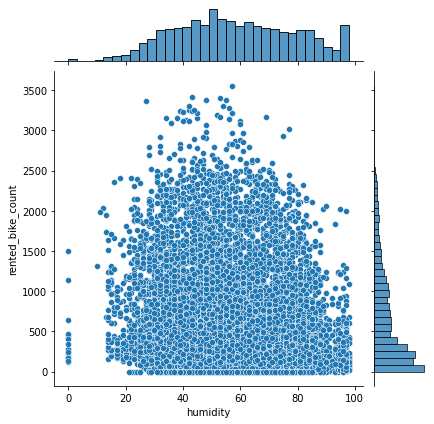

In [ ]:
sns.jointplot(x='humidity',y='rented_bike_count',data=df)

**Bivariate Analysis**

In [ ]:
# Function for plotting one feature against another
def get_plot(x,hue):
  x=x
  hue=hue
  y='rented_bike_count'
  plt.figure(figsize=(17,5))
  sns.pointplot(x=x,y=y,hue=hue,data=df)
  plt.xlabel(x,fontsize=(15))
  plt.ylabel(y,fontsize=(15))
  plt.title(y+' '+'during different {}'.format(hue),fontsize=(20))


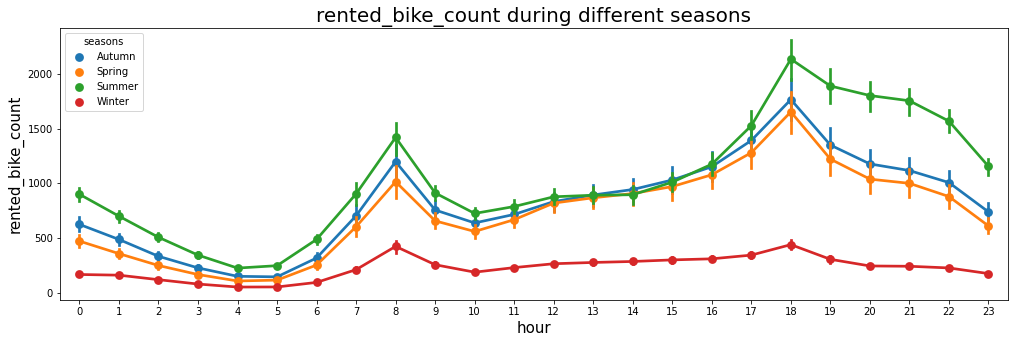

In [ ]:
# Hourly rental bike counts during different seasons
get_plot('hour','seasons')

Inference:

1)During Summer ,rented bikes are more in each hour than other seasons

2)During Winter ,rented bikes are less in each hour compared to other seasons

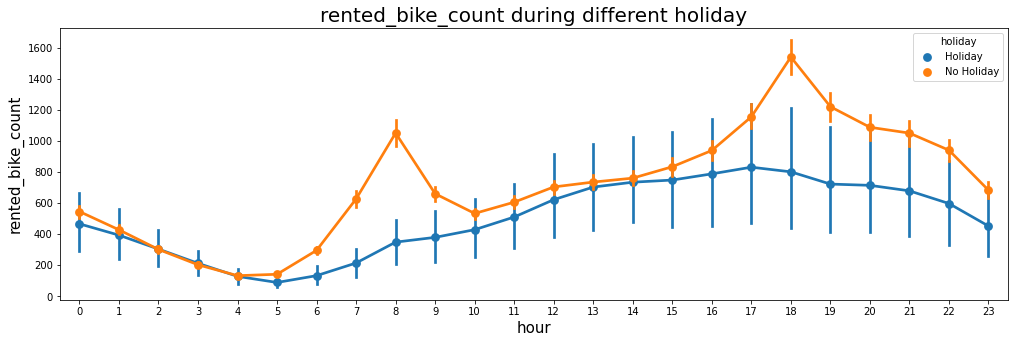

In [ ]:
# Hourly rental bike counts during different holiday
get_plot('hour','holiday')

Inference: During No Holiday,rented bikes are more than during Holidays in each hour

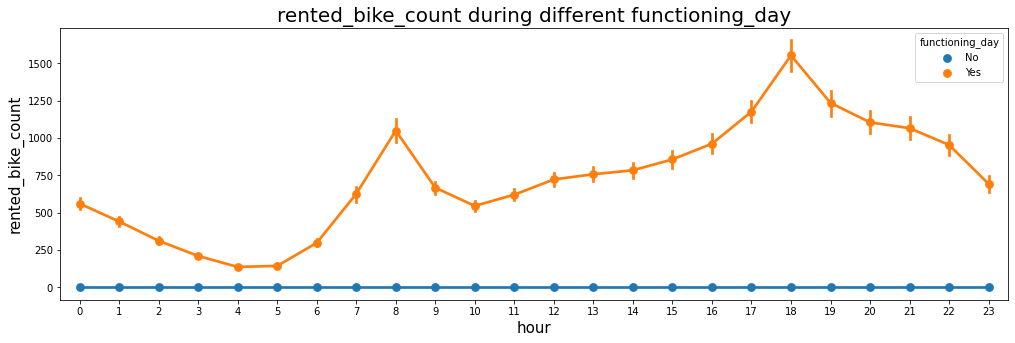

In [ ]:
# Hourly rental bike counts during different functioning days
get_plot('hour','functioning_day')

Inference: During functioning days,rented bikes count is more than non_functioning days in each hour

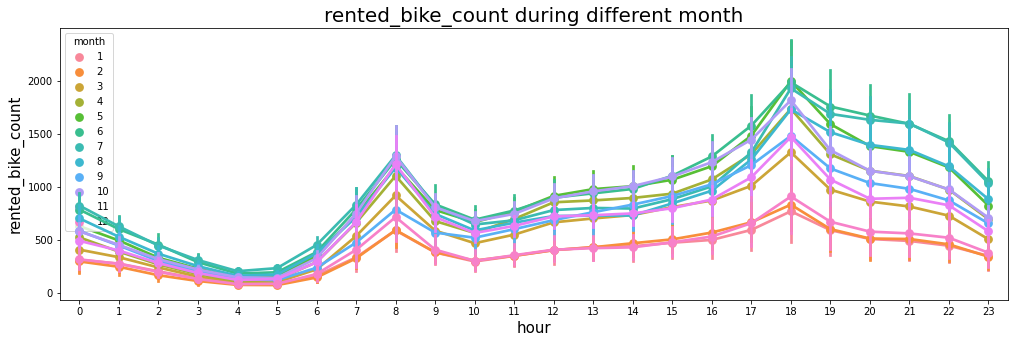

In [ ]:
# Hourly rental bike counts during different months
get_plot('hour','month')

Inference: 


During may,june,july and august  months rented bikes count is observed more during 5pm to 7pm

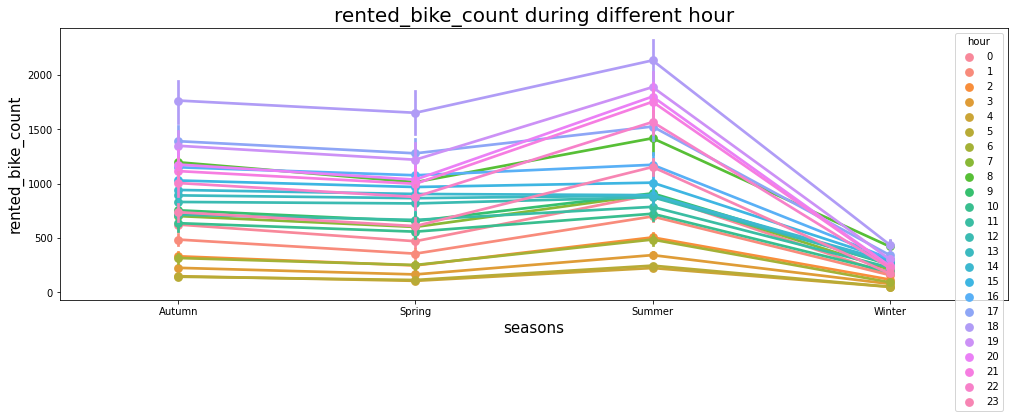

In [ ]:
# Seasonly rental bikes count during different hours
get_plot('seasons','hour')

Inference:

 1)In all seasons,during 5pm-6pm rented bike counts are more

 2)During Summer,5pm-9pm rented bike counts are more

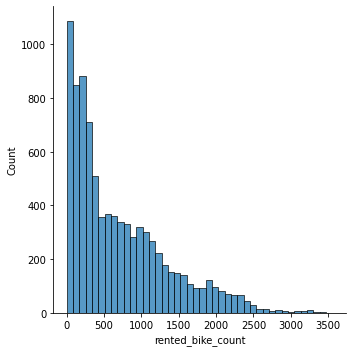

In [ ]:
# Checking the distribution of the feature rented_bike_count
sns.displot(df['rented_bike_count'])

Inference: Distribution is  Highly positively skewed

In [ ]:
# len(df[df['rented_bike_count']==0])

295

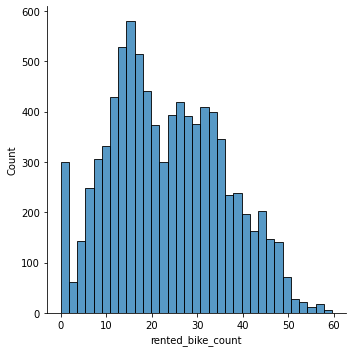

In [ ]:
# Applying square root transformation to convert positively skewed into normal distribution
sns.displot(np.sqrt(df['rented_bike_count']))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Theoretical quantiles')

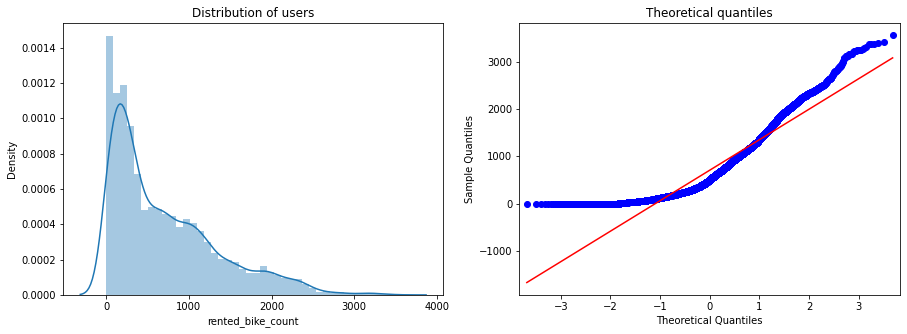

In [ ]:
# Plotting distribution and theoretical quantiles of rental bikes count
from statsmodels.graphics.gofplots import qqplot
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
sns.distplot(df['rented_bike_count'],ax=ax1)
ax1.set_title('Distribution of users')
qqplot(df['rented_bike_count'],ax=ax2,line='s')
ax2.set_title('Theoretical quantiles')

Inference:

1)In Distribution plot,distribution is positively skewed

2)In Quantile plot, only few points are aligned along line

In [ ]:
# Applying square root transformation to convert positively skewed into normal distribution
df['bike_count']=np.sqrt(df['rented_bike_count'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Theoretical quantiles')

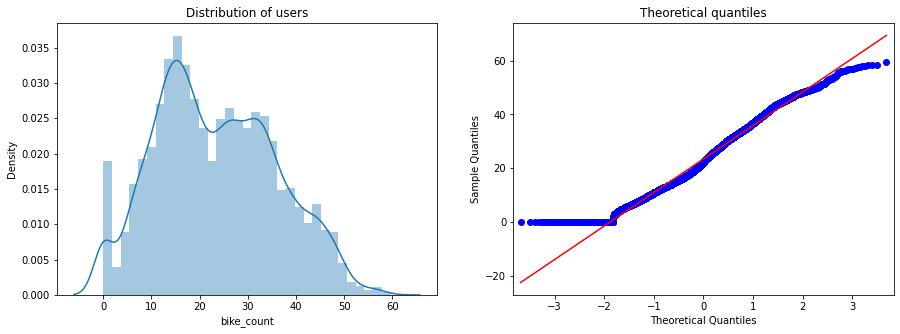

In [ ]:
from statsmodels.graphics.gofplots import qqplot
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
sns.distplot(df['bike_count'],ax=ax1)
ax1.set_title('Distribution of users')
qqplot(df['bike_count'],ax=ax2,line='s')
ax2.set_title('Theoretical quantiles')

Inference:

1)In Distribution plot,distribution is normal

2)In Quantile plot, almost all points are aligned along line

#**Correlation Matrix**

In [ ]:
df.describe().columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'bike_count'],
      dtype='object')

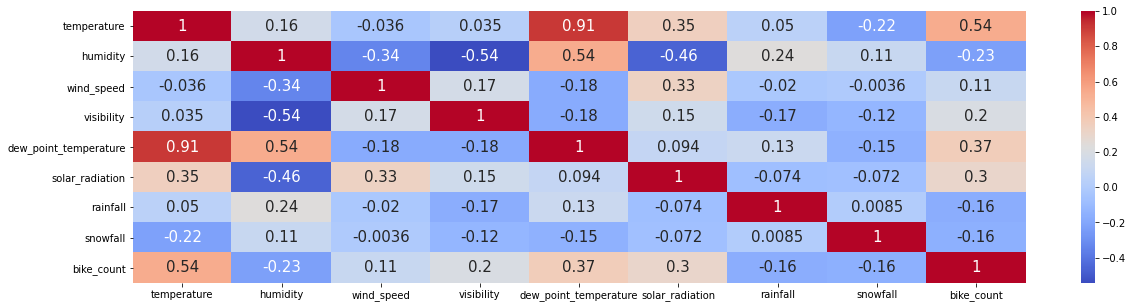

In [ ]:
numerical_features=list(df.describe().columns)
corr=df[numerical_features[1:]].corr()
plt.figure(figsize=(20,5))
sns.heatmap(corr,cmap='coolwarm',annot=True,annot_kws={'size':15})

Inference: Temperature and dew_point_temperature are highly correlated

In [ ]:
# Converting correlated 2 features into single feature using proportion of their correlation
df['new_temperature']=df['temperature']*0.6+df['dew_point_temperature']*0.4

In [ ]:
# Dropping unwanted columns
df.drop(['temperature','dew_point_temperature','rented_bike_count'],axis=1,inplace=True)


#**One Hot Encoding**

In [ ]:
# Making copy of the original dataframe
new_df=df.copy()

In [ ]:
new_df.head()

,hour,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,bike_count,new_temperature
0,0,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,15.937377,-10.16
1,1,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,14.282857,-10.34
2,2,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,13.152946,-10.68
3,3,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,10.344080,-10.76
4,4,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,8.831761,-11.04


In [ ]:
categorical_columns=list(df.describe(include=(['category'])).columns) 
categorical_columns

['hour', 'seasons', 'holiday', 'functioning_day', 'month']

In [ ]:
dummy_df=pd.get_dummies(new_df,columns=categorical_columns,prefix=categorical_columns)

In [ ]:
dummy_df.head()

,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,bike_count,new_temperature,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,functioning_day_No,functioning_day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,37,2.2,2000,0.0,0.0,0.0,15.937377,-10.16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,38,0.8,2000,0.0,0.0,0.0,14.282857,-10.34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,39,1.0,2000,0.0,0.0,0.0,13.152946,-10.68,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,40,0.9,2000,0.0,0.0,0.0,10.344080,-10.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,36,2.3,2000,0.0,0.0,0.0,8.831761,-11.04,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0


#**Input Split**

In [ ]:
X=dummy_df.drop('bike_count',axis=1)
y=dummy_df['bike_count']

In [ ]:
# Splitting the Dataset into train and test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
X_train

,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,new_temperature,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,seasons_Autumn,seasons_Spring,seasons_Summer,seasons_Winter,holiday_Holiday,holiday_No Holiday,functioning_day_No,functioning_day_Yes,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
5863,53,1.1,2000,0.22,0.0,0.0,26.22,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
7179,57,1.6,2000,0.00,0.0,0.0,13.06,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
947,51,4.5,1746,0.73,0.0,0.5,-7.34,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5476,80,1.0,1112,0.00,0.0,0.0,22.92,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7339,57,1.7,2000,0.00,0.0,0.0,14.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,55,1.9,2000,0.00,0.0,0.0,-4.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5695,75,1.2,1103,0.10,0.0,0.0,25.74,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8006,33,1.7,2000,2.12,0.0,0.0,4.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1361,31,3.3,1745,0.41,0.0,0.3,-16.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6570, 51)
(6570,)
(2190, 51)
(2190,)


#**Finding best model and it's training**

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# Creating list of different regression models
models=[LinearRegression(),Ridge(),Lasso(),ElasticNetCV(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),XGBRegressor()]

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

# model_list=[]
# cv_score_list=[]
def train(model):
  kfold=KFold(n_splits=5,random_state=42,shuffle=True)
  pred=cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
  cv_score=pred.mean()
  # model_list.append(model)
  # cv_score_list.append(abs(cv_score))
  print('Model:',model)
  print('CV score:',abs(cv_score))


In [ ]:
for model in models:
  train(model)


Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
CV score: 37.78116277285703
Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
CV score: 37.77992011100919
Model: Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
CV score: 92.79729312360823
Model: ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
CV score: 94.07404881704056
Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      m

#**Random Forest Algorithm**

In [ ]:
# Model paramters setup

# Taking n_estimators from 10 to 100
n_estimators=[int(x) for x in np.linspace(start=10,stop=100,num=10)]
max_depth=[60,70,80,90,100]
min_samples_split=[2,3,4,5]
min_samples_leaf=[2,3,5]
bootstrap=[True,False]

In [ ]:
parameters={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_model=RandomForestRegressor()
rf_grid=GridSearchCV(rf_model,param_grid=parameters,cv=3,scoring='neg_mean_squared_error',verbose=2,n_jobs=4)

rf_grid.fit(X_train,y_train)



Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   37.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 11.3min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 17.4min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed: 24.8min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 35.6min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 50.9min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 68.6min
[Parallel(n_jobs=4)]: Done 3600 out of 3600 | elapsed: 76.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# Finding the model's best estimator
best_model=rf_grid.best_estimator_
best_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_grid.best_score_

-18.800291774827617

In [ ]:
rf_optimal_model=best_model
train_preds=best_model.predict(X_train)
test_preds=best_model.predict(X_test)

In [ ]:
y_train

5863    31.717503
7179    18.841444
947     15.716234
5476    14.899664
7339     0.000000
          ...    
599     13.000000
5695    34.278273
8006    30.049958
1361    14.000000
1547    13.964240
Name: bike_count, Length: 6570, dtype: float64

In [ ]:
train_preds

array([30.47865879, 18.07408372, 15.36058109, ..., 30.37288276,
       13.76424393, 13.93281524])

In [ ]:
y_test

1185    19.672316
7819    43.127717
6034    25.475478
262     14.899664
3537    31.384710
          ...    
3360    23.515952
4736    29.866369
6136    30.016662
8098     0.000000
2553    22.803509
Name: bike_count, Length: 2190, dtype: float64

In [ ]:
test_preds

array([16.26740864, 38.8658592 , 25.09104037, ..., 28.8535001 ,
        0.27871367, 25.36036816])

#**Metric Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mse_train=mean_squared_error(y_train,train_preds)
print('mse train:',mse_train)

mae_train=mean_absolute_error(y_train,train_preds)
print('mae train:',mae_train)

r2_train=r2_score(y_train,train_preds)
print('r2_train:',r2_train)

# mape_train=np.mean(abs(y_train-train_preds)*100/y_train)
# print('mape train:',mape_train)


mse_test=mean_squared_error(y_test,test_preds)
print('mse test:',mse_test)

mae_test=mean_absolute_error(y_test,test_preds)
print('mae test:',mae_test)

r2_test=r2_score(y_test,test_preds)
print('r2_test:',r2_test)

# mape_test=np.mean(abs(y_test-test_preds)*100/y_test)
# print('mape test:',mape_test)


mse train: 4.7164834962979105
mae train: 1.3878523310803426
r2_train: 0.9693763805198041
mse test: 15.630774105658734
mae test: 2.6787091163502423
r2_test: 0.9009997008812781
